In [1]:
%matplotlib inline

In [2]:
from scipy import signal
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator import plot_resonator
from kid_readout.roach import demodulator

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2016-12-09_120129_sweep_stream_on_off_wideband/')

In [4]:
all_sss = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStream')]
all_snap = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [5]:
[(snap.x.ptp(), snap.y.ptp()) for snap in all_snap]

[(164.0, 170.0),
 (59.0, 67.0),
 (144.0, 139.0),
 (53.0, 59.0),
 (182.0, 185.0),
 (68.0, 65.0),
 (112.0, 116.0),
 (40.0, 39.0),
 (83.0, 91.0),
 (32.0, 33.0),
 (69.0, 70.0),
 (25.0, 27.0),
 (64.0, 61.0),
 (25.0, 24.0)]

In [6]:
num_channels = 7
attenuations = 2
sss_dict = {}
for lo_index in range(num_channels):
    sss_dict[lo_index] = [sss for sss in all_sss if sss.state.lo_index == lo_index]

In [7]:
bin(all_sss[0].stream.roach_state.fft_shift_register)

'0b11111111111111111000'

In [8]:
def plot_noise(sss, ax):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('frequency / Hz')
    ax.set_ylabel('$S \; / \; \mathrm{Hz}^{-1}$')
    ax.plot(sss.S_frequency, sss.S_xx, '-b', label='$S_{xx}$')
    ax.plot(sss.S_frequency, sss.S_yy, '-g', label='$S_{yy}$')

# LO index 0

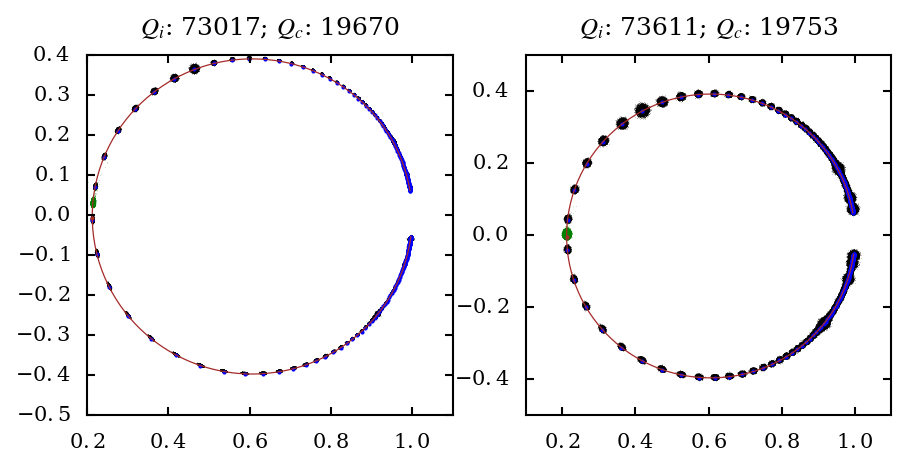

In [9]:
lo_index = 0
fig, axes = plt.subplots(1, attenuations, figsize=(2 * attenuations, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

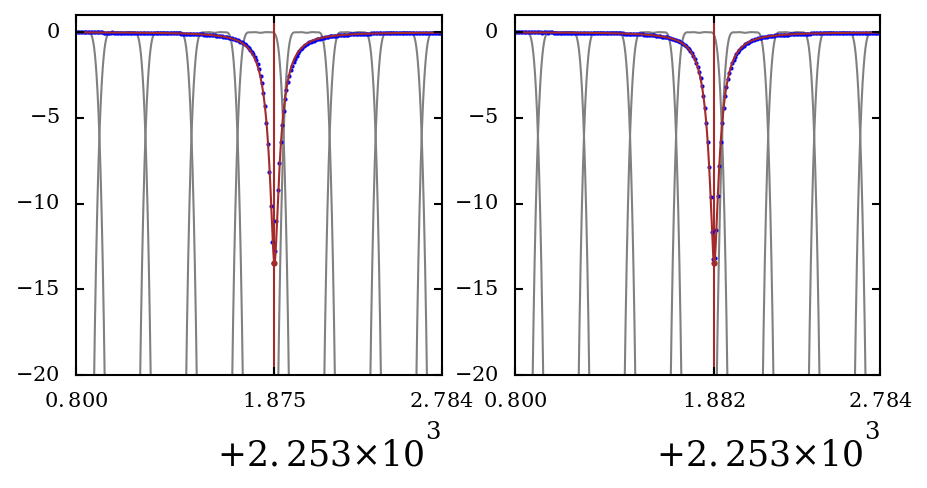

In [10]:
lo_index = 0
f_scale = 1e-6
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    demod = demodulator.Demodulator(nfft=sss.stream.roach_state.num_filterbank_channels, num_taps=8,
                                    window=signal.hamming, hardware_delay_samples=0)
    for filterbank_bin in np.unique([stream.filterbank_bin for stream in sss.sweep.streams]):
        f_filterbank = (sss.stream.roach_state.adc_sample_rate * filterbank_bin /
                        sss.stream.roach_state.num_filterbank_channels)
        ax.plot(f_scale * (sss.stream.roach_state.lo_frequency + f_filterbank + 
                           sss.stream.stream_sample_rate * demod._window_frequency),
                20 * np.log10(demod._window_response),
                '-', color='gray')
    ax.axvline(f_scale * sss.resonator.f_0, color='brown')
    plot_resonator.amplitude(ax, sss.resonator, f_scale=f_scale, normalize=True)
    ax.set_xlim(f_scale * sss.sweep.streams[0].frequency, f_scale * sss.sweep.streams[-1].frequency)
    ax.set_ylim(-20, 1)
    ax.tick_params(labelsize=5)

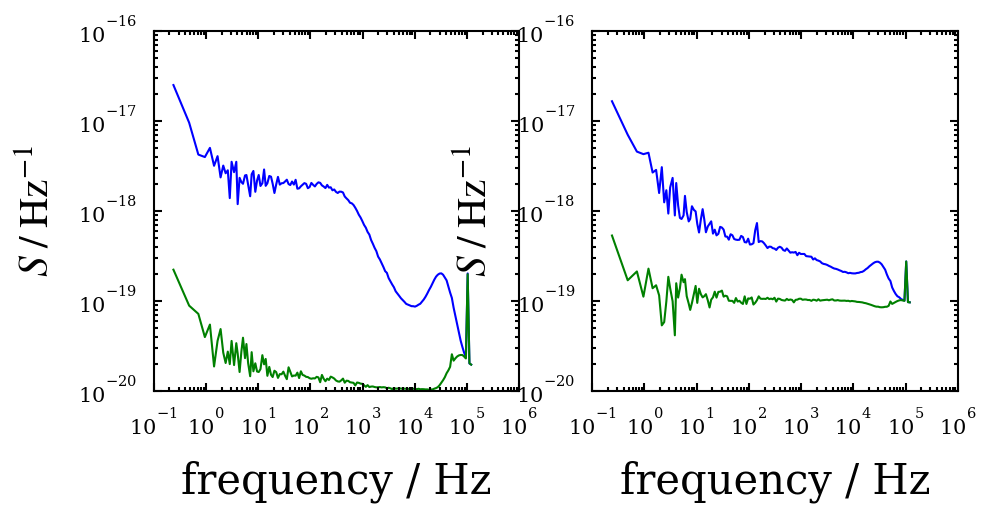

In [11]:
lo_index = 0
fig, axes = plt.subplots(1, attenuations, figsize=(2 * attenuations, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    plot_noise(sss, ax)
    ax.tick_params(labelsize=5)

# LO index 1

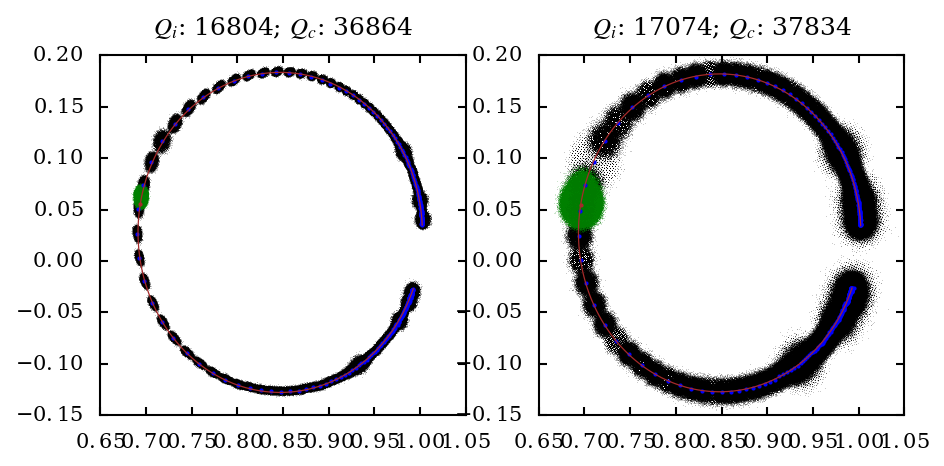

In [12]:
lo_index = 1
fig, axes = plt.subplots(1, attenuations, figsize=(2 * attenuations, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

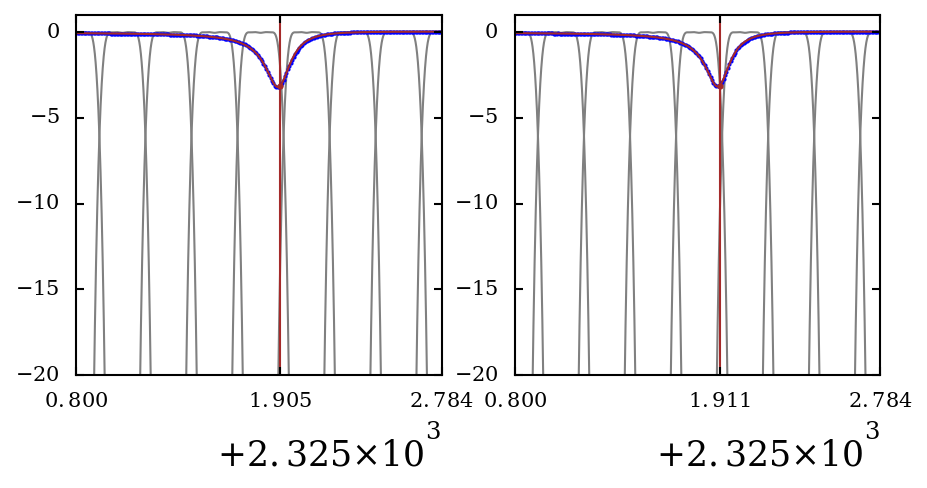

In [13]:
lo_index = 1
f_scale = 1e-6
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    demod = demodulator.Demodulator(nfft=sss.stream.roach_state.num_filterbank_channels, num_taps=8,
                                    window=signal.hamming, hardware_delay_samples=0)
    for filterbank_bin in np.unique([stream.filterbank_bin for stream in sss.sweep.streams]):
        f_filterbank = (sss.stream.roach_state.adc_sample_rate * filterbank_bin /
                        sss.stream.roach_state.num_filterbank_channels)
        ax.plot(f_scale * (sss.stream.roach_state.lo_frequency + f_filterbank + 
                           sss.stream.stream_sample_rate * demod._window_frequency),
                20 * np.log10(demod._window_response),
                '-', color='gray')
    ax.axvline(f_scale * sss.resonator.f_0, color='brown')
    plot_resonator.amplitude(ax, sss.resonator, f_scale=f_scale, normalize=True)
    ax.set_xlim(f_scale * sss.sweep.streams[0].frequency, f_scale * sss.sweep.streams[-1].frequency)
    ax.set_ylim(-20, 1)
    ax.tick_params(labelsize=5)

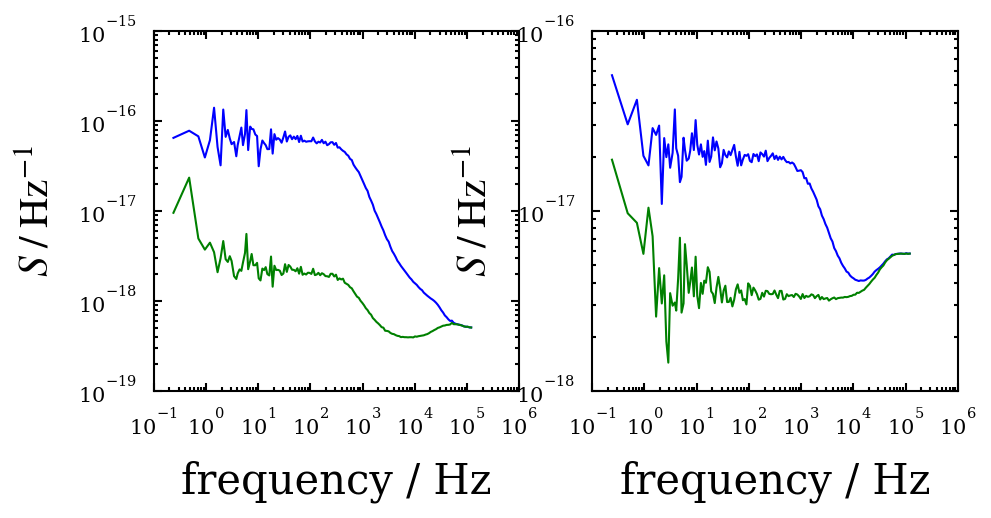

In [14]:
lo_index = 1
fig, axes = plt.subplots(1, attenuations, figsize=(2 * attenuations, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    plot_noise(sss, ax)
    ax.tick_params(labelsize=5)

# LO index 2

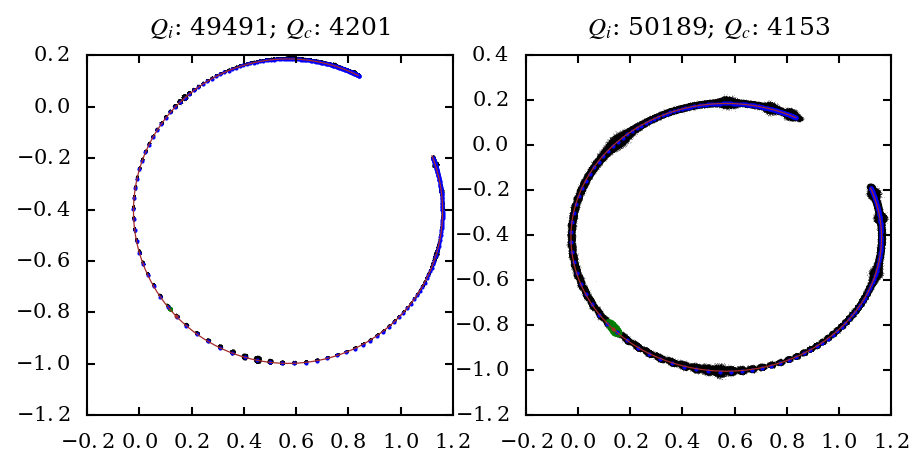

In [15]:
lo_index = 2
fig, axes = plt.subplots(1, attenuations, figsize=(2 * attenuations, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

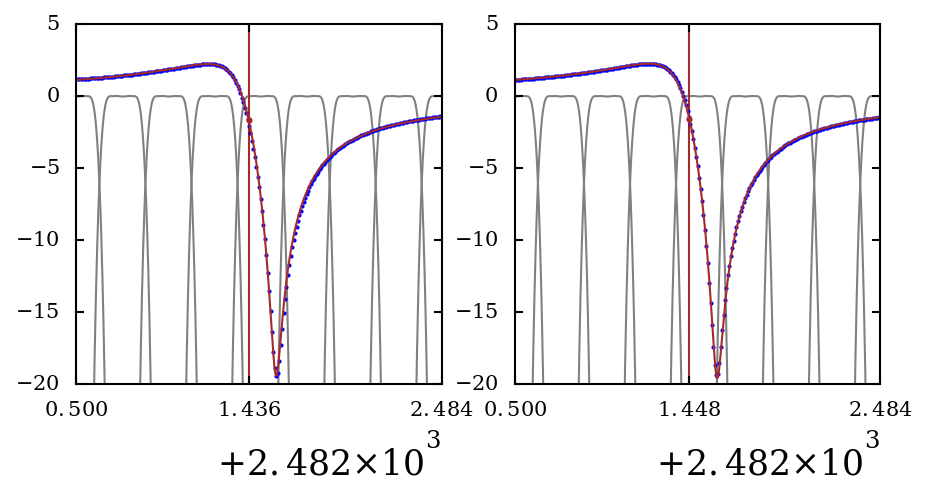

In [30]:
lo_index = 2
f_scale = 1e-6
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    demod = demodulator.Demodulator(nfft=sss.stream.roach_state.num_filterbank_channels, num_taps=8,
                                    window=signal.hamming, hardware_delay_samples=0)
    for filterbank_bin in np.unique([stream.filterbank_bin for stream in sss.sweep.streams]):
        f_filterbank = (sss.stream.roach_state.adc_sample_rate * filterbank_bin /
                        sss.stream.roach_state.num_filterbank_channels)
        ax.plot(f_scale * (sss.stream.roach_state.lo_frequency + f_filterbank + 
                           sss.stream.stream_sample_rate * demod._window_frequency),
                20 * np.log10(demod._window_response),
                '-', color='gray')
    ax.axvline(f_scale * sss.resonator.f_0, color='brown')
    plot_resonator.amplitude(ax, sss.resonator, f_scale=f_scale, normalize=True)
    ax.set_xlim(f_scale * sss.sweep.streams[0].frequency, f_scale * sss.sweep.streams[-1].frequency)
    ax.set_ylim(-20, 5)
    ax.tick_params(labelsize=5)

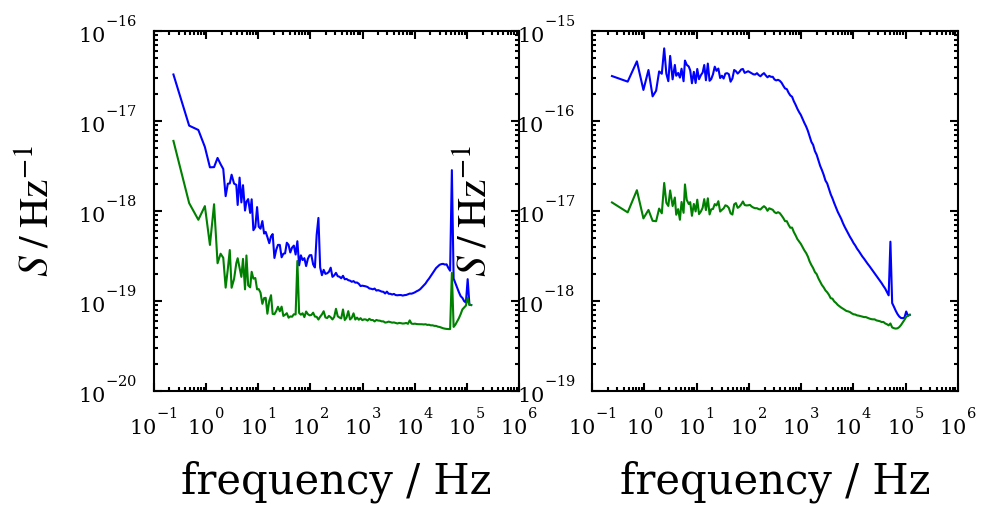

In [17]:
lo_index = 2
fig, axes = plt.subplots(1, attenuations, figsize=(2 * attenuations, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    plot_noise(sss, ax)
    ax.tick_params(labelsize=5)

# LO index 3

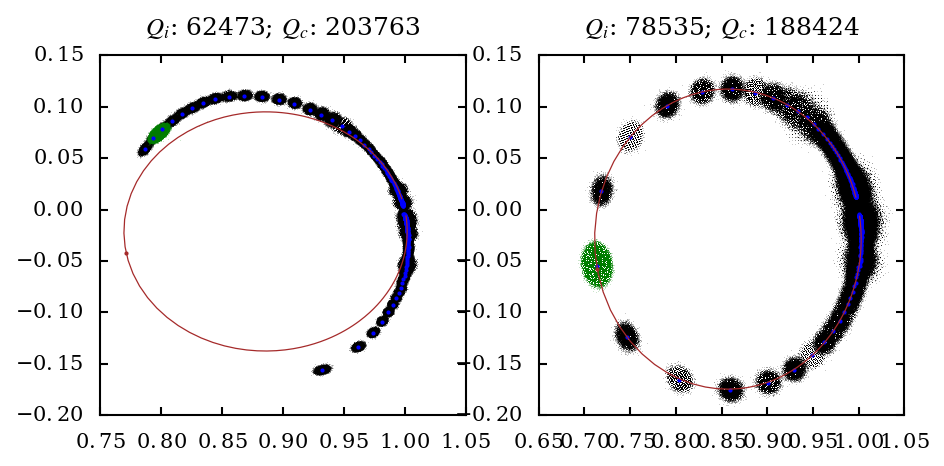

In [18]:
lo_index = 3
fig, axes = plt.subplots(1, attenuations, figsize=(2 * attenuations, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

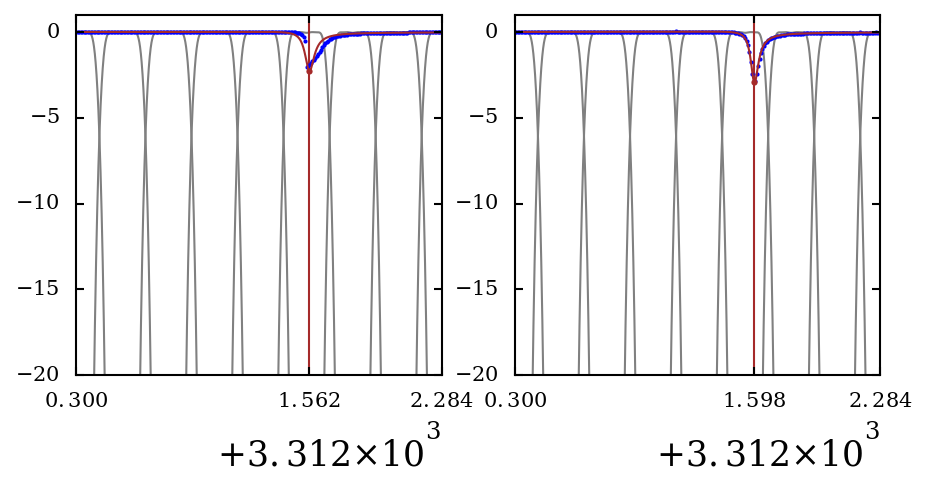

In [19]:
lo_index = 3
f_scale = 1e-6
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    demod = demodulator.Demodulator(nfft=sss.stream.roach_state.num_filterbank_channels, num_taps=8,
                                    window=signal.hamming, hardware_delay_samples=0)
    for filterbank_bin in np.unique([stream.filterbank_bin for stream in sss.sweep.streams]):
        f_filterbank = (sss.stream.roach_state.adc_sample_rate * filterbank_bin /
                        sss.stream.roach_state.num_filterbank_channels)
        ax.plot(f_scale * (sss.stream.roach_state.lo_frequency + f_filterbank + 
                           sss.stream.stream_sample_rate * demod._window_frequency),
                20 * np.log10(demod._window_response),
                '-', color='gray')
    ax.axvline(f_scale * sss.resonator.f_0, color='brown')
    plot_resonator.amplitude(ax, sss.resonator, f_scale=f_scale, normalize=True)
    ax.set_xlim(f_scale * sss.sweep.streams[0].frequency, f_scale * sss.sweep.streams[-1].frequency)
    ax.set_ylim(-20, 1)
    ax.tick_params(labelsize=5)

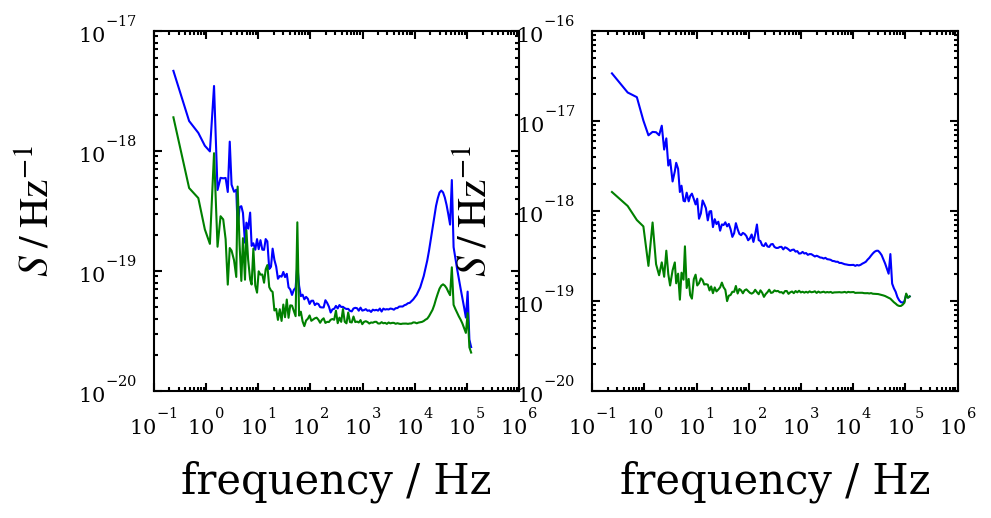

In [20]:
lo_index = 3
fig, axes = plt.subplots(1, attenuations, figsize=(2 * attenuations, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    plot_noise(sss, ax)
    ax.tick_params(labelsize=5)

# LO index 4

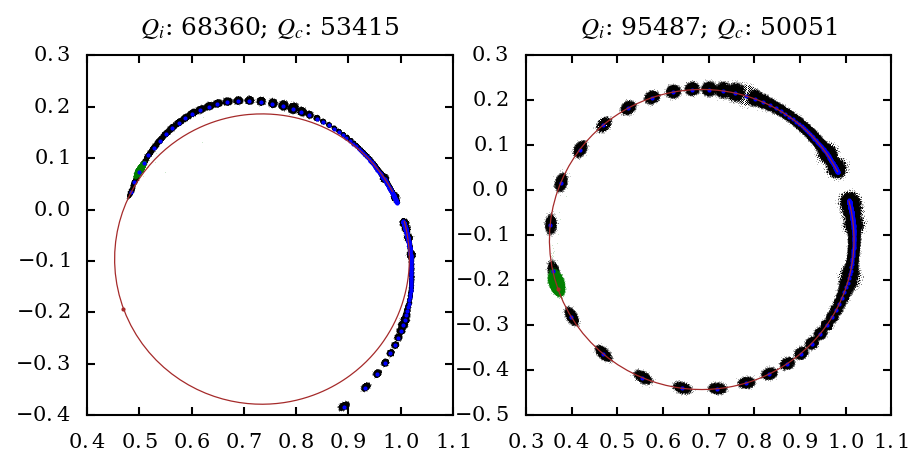

In [21]:
lo_index = 4
fig, axes = plt.subplots(1, attenuations, figsize=(2 * attenuations, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

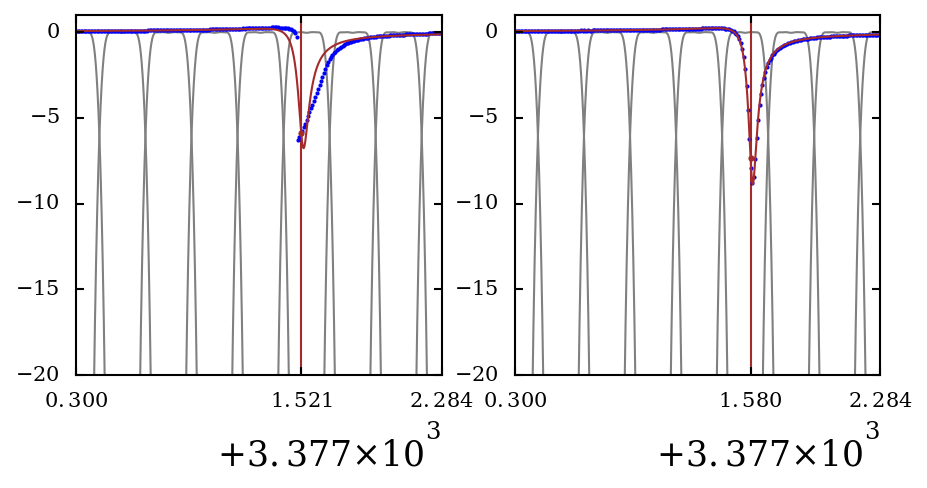

In [22]:
lo_index = 4
f_scale = 1e-6
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    demod = demodulator.Demodulator(nfft=sss.stream.roach_state.num_filterbank_channels, num_taps=8,
                                    window=signal.hamming, hardware_delay_samples=0)
    for filterbank_bin in np.unique([stream.filterbank_bin for stream in sss.sweep.streams]):
        f_filterbank = (sss.stream.roach_state.adc_sample_rate * filterbank_bin /
                        sss.stream.roach_state.num_filterbank_channels)
        ax.plot(f_scale * (sss.stream.roach_state.lo_frequency + f_filterbank + 
                           sss.stream.stream_sample_rate * demod._window_frequency),
                20 * np.log10(demod._window_response),
                '-', color='gray')
    ax.axvline(f_scale * sss.resonator.f_0, color='brown')
    plot_resonator.amplitude(ax, sss.resonator, f_scale=f_scale, normalize=True)
    ax.set_xlim(f_scale * sss.sweep.streams[0].frequency, f_scale * sss.sweep.streams[-1].frequency)
    ax.set_ylim(-20, 1)
    ax.tick_params(labelsize=5)

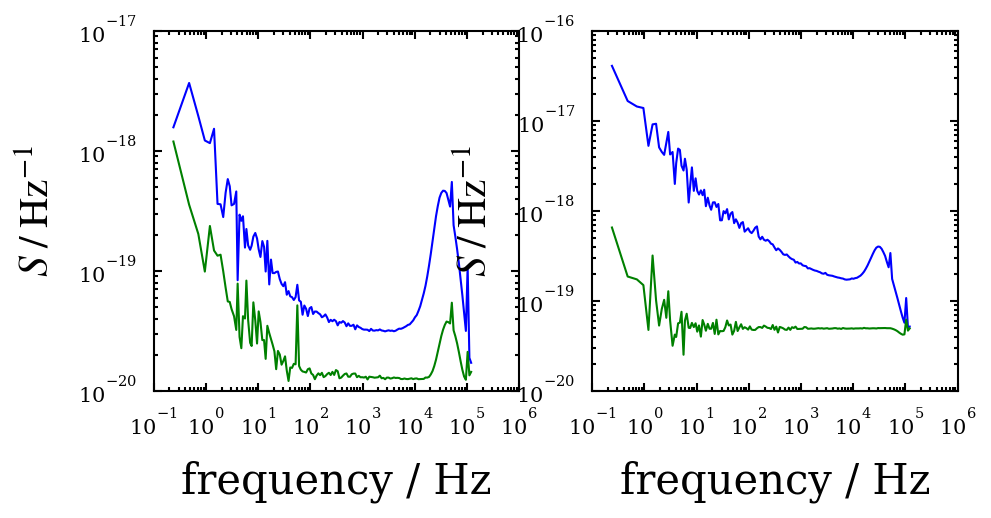

In [23]:
lo_index = 4
fig, axes = plt.subplots(1, attenuations, figsize=(2 * attenuations, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    plot_noise(sss, ax)
    ax.tick_params(labelsize=5)

# LO index 5

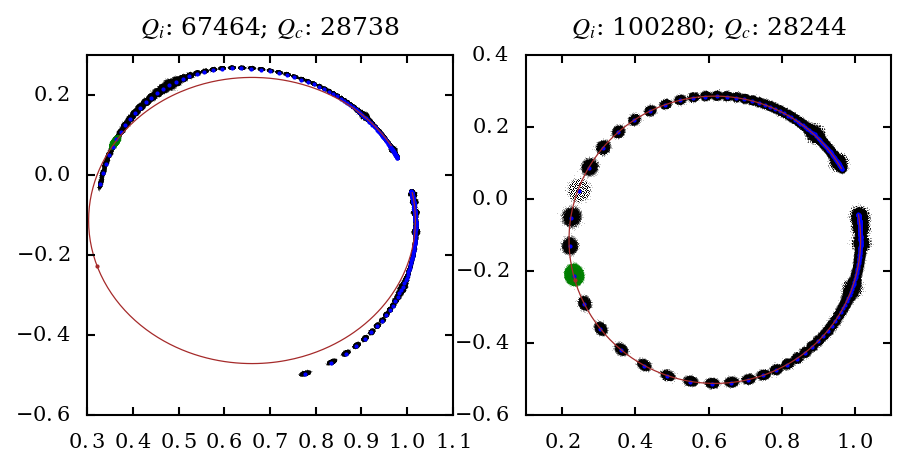

In [24]:
lo_index = 5
fig, axes = plt.subplots(1, attenuations, figsize=(2 * attenuations, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

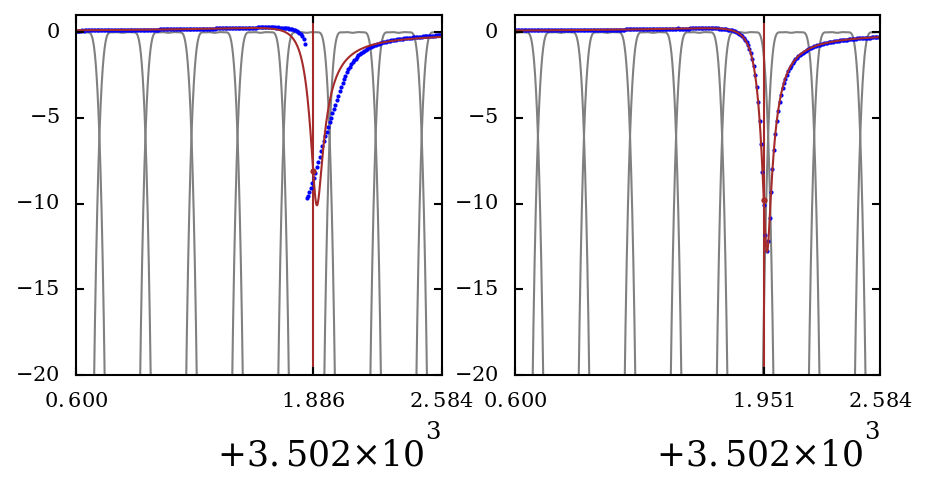

In [25]:
lo_index = 5
f_scale = 1e-6
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    demod = demodulator.Demodulator(nfft=sss.stream.roach_state.num_filterbank_channels, num_taps=8,
                                    window=signal.hamming, hardware_delay_samples=0)
    for filterbank_bin in np.unique([stream.filterbank_bin for stream in sss.sweep.streams]):
        f_filterbank = (sss.stream.roach_state.adc_sample_rate * filterbank_bin /
                        sss.stream.roach_state.num_filterbank_channels)
        ax.plot(f_scale * (sss.stream.roach_state.lo_frequency + f_filterbank + 
                           sss.stream.stream_sample_rate * demod._window_frequency),
                20 * np.log10(demod._window_response),
                '-', color='gray')
    ax.axvline(f_scale * sss.resonator.f_0, color='brown')
    plot_resonator.amplitude(ax, sss.resonator, f_scale=f_scale, normalize=True)
    ax.set_xlim(f_scale * sss.sweep.streams[0].frequency, f_scale * sss.sweep.streams[-1].frequency)
    ax.set_ylim(-20, 1)
    ax.tick_params(labelsize=5)

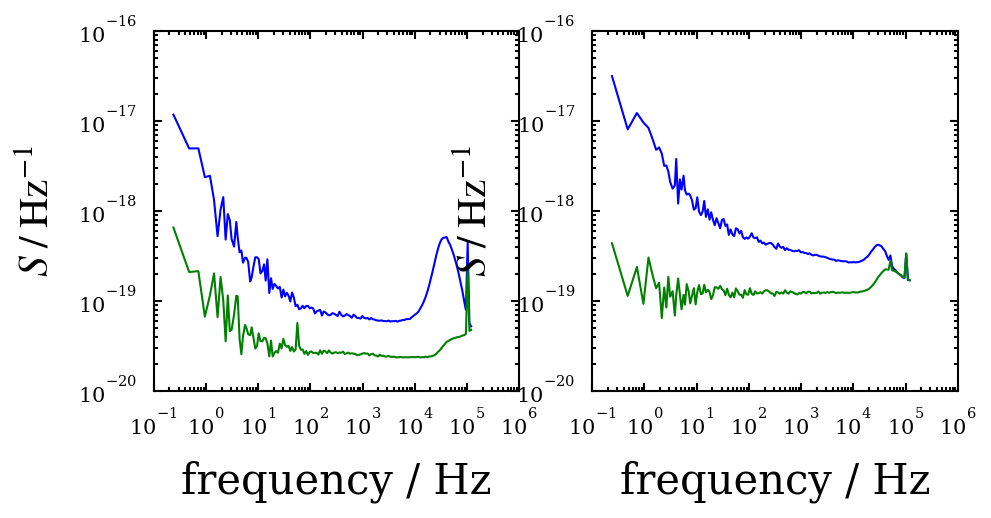

In [26]:
lo_index = 5
fig, axes = plt.subplots(1, attenuations, figsize=(2 * attenuations, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    plot_noise(sss, ax)
    ax.tick_params(labelsize=5)

# LO index 6

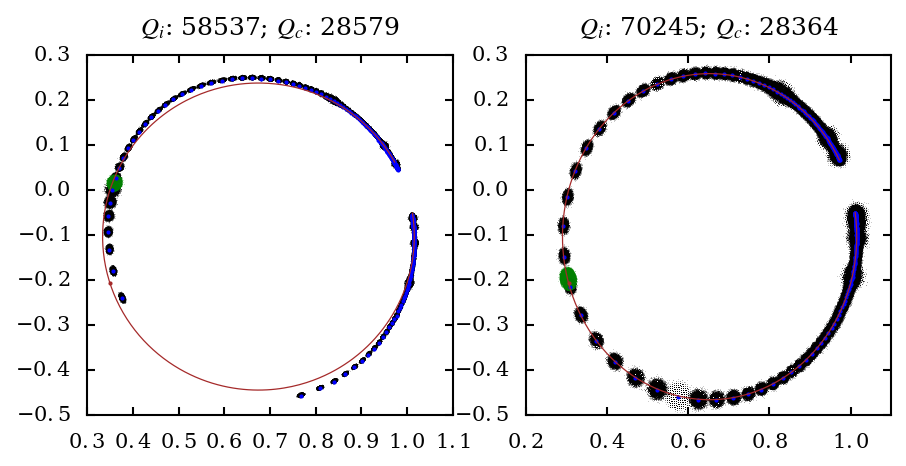

In [27]:
lo_index = 6
fig, axes = plt.subplots(1, attenuations, figsize=(2 * attenuations, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

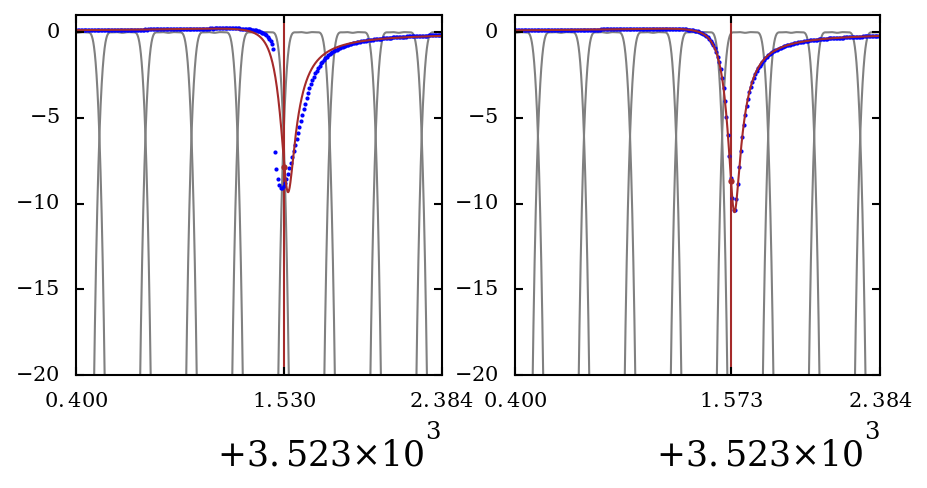

In [28]:
lo_index = 6
f_scale = 1e-6
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    demod = demodulator.Demodulator(nfft=sss.stream.roach_state.num_filterbank_channels, num_taps=8,
                                    window=signal.hamming, hardware_delay_samples=0)
    for filterbank_bin in np.unique([stream.filterbank_bin for stream in sss.sweep.streams]):
        f_filterbank = (sss.stream.roach_state.adc_sample_rate * filterbank_bin /
                        sss.stream.roach_state.num_filterbank_channels)
        ax.plot(f_scale * (sss.stream.roach_state.lo_frequency + f_filterbank + 
                           sss.stream.stream_sample_rate * demod._window_frequency),
                20 * np.log10(demod._window_response),
                '-', color='gray')
    ax.axvline(f_scale * sss.resonator.f_0, color='brown')
    plot_resonator.amplitude(ax, sss.resonator, f_scale=f_scale, normalize=True)
    ax.set_xlim(f_scale * sss.sweep.streams[0].frequency, f_scale * sss.sweep.streams[-1].frequency)
    ax.set_ylim(-20, 1)
    ax.tick_params(labelsize=5)

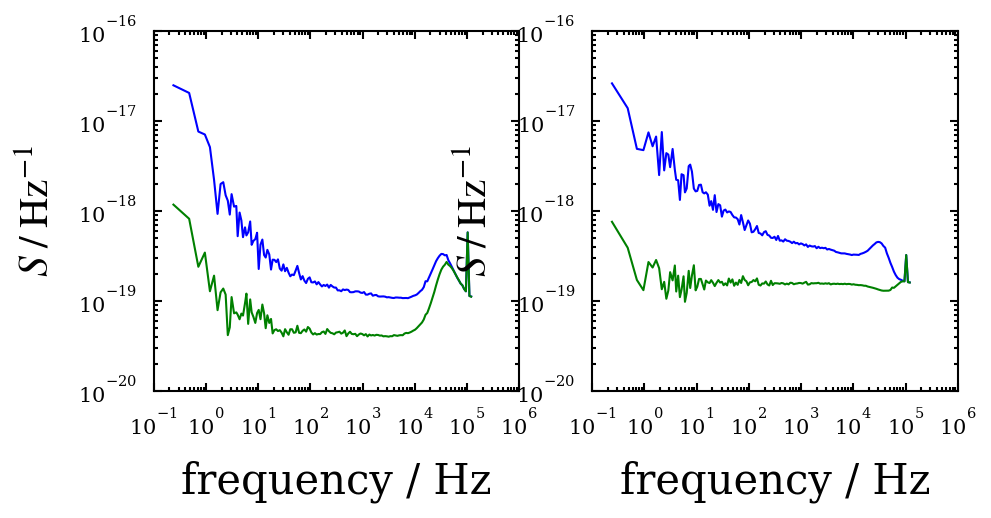

In [29]:
lo_index = 6
fig, axes = plt.subplots(1, attenuations, figsize=(2 * attenuations, 2))
for sss, ax in zip(sss_dict[lo_index], axes.flatten()):
    plot_noise(sss, ax)
    ax.tick_params(labelsize=5)